###### Neural networks with PyTorch

In [1]:
#Import Packages
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import torch
import matplotlib.pyplot as plt
import helper

In [2]:
#run the cell
from torchvision import datasets,transforms
# Define a transform to normalize the data
transform=transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.5,),(0.5,)),
                            ])
#Download and load the training data
trainset=datasets.MNIST('~/pytorch/MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [3]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


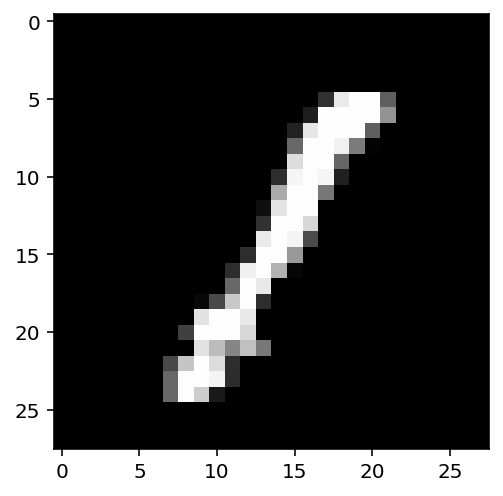

In [4]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r');

> **Exercise:** Flatten the batch of images images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [5]:
#Solution
#create sigmoid activation function
def activation(x):
    return 1/(1+torch.exp(-x))
#Flatten input image
inputs=images.view(images.shape[0],-1)
#Create weights & biases
w1=torch.randn(784,256)
b1=torch.randn(256)
w2=torch.randn(256,10)
b2=torch.randn(10)
#Create hidden Layer
hidden=activation(torch.mm(inputs,w1)+b1)
#Cretae Output Layer
outputs=torch.mm(hidden,w2)+b2
print(outputs)
print(outputs.shape)

tensor([[ 5.8376e+00,  8.4102e-01, -6.0298e+00,  1.4951e+01,  8.1186e+00,
         -2.9101e+00,  5.9768e-01,  3.3173e+00, -1.3130e+01, -9.6711e+00],
        [ 1.4739e+01, -2.3093e+00, -2.4436e+00,  3.9767e-01,  6.6485e-01,
         -1.2130e-01,  2.5090e+00,  1.1371e+01, -1.3074e+01, -1.5842e+01],
        [ 1.5295e+01,  9.9980e+00, -1.6644e+00,  1.2932e+01,  1.2316e+01,
         -1.0291e+01, -2.2188e+00,  1.6764e+01, -5.1792e+00, -1.4241e+01],
        [ 1.0951e+01,  1.2520e+01, -4.6553e+00,  7.7213e+00,  1.0731e+01,
         -9.8237e+00, -6.7101e+00,  8.0939e+00,  4.9296e+00, -1.7554e+01],
        [ 2.5604e+01,  7.0814e+00, -3.3330e+00,  1.0877e+01,  1.3821e+01,
         -1.1137e+01,  3.9470e+00,  1.2872e+01, -1.9595e+00, -1.4624e+01],
        [ 1.0616e+01, -9.5802e-01, -1.3465e+01,  6.7263e+00,  4.0843e+00,
         -7.0915e+00, -3.0493e-01,  9.7285e+00, -9.1702e+00, -1.3556e+01],
        [ 1.0090e+00, -1.2592e+00, -4.3574e+00,  1.1805e+01,  1.6068e+01,
         -5.0659e+00,  1.6781e+0

> **Exercise:** Implement a function softmax that performs the softmax calculation and returns probability distributions for each example in the batch. Note that you'll need to pay attention to the shapes when doing this. If you have a tensor a with shape (64, 10) and a tensor b with shape (64,), doing a/b will give you an error because PyTorch will try to do the division across the columns (called broadcasting) but you'll get a size mismatch. The way to think about this is for each of the 64 examples, you only want to divide by one value, the sum in the denominator. So you need b to have a shape of (64, 1). This way PyTorch will divide the 10 values in each row of a by the one value in each row of b. Pay attention to how you take the sum as well. You'll need to define the dim keyword in torch.sum. Setting dim=0 takes the sum across the rows while dim=1 takes the sum across the columns.

In [6]:
#Create softmax function
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)
#out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(outputs)
#Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
#Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


###### Building networks with PyTorch

In [7]:
from torch import nn

In [8]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Set Input to hiddin layer linear transformation
        self.hidden=nn.Linear(784,256)
        #Set ouyput layer- 10 units-1 for each digit
        self.output=nn.Linear(256,10)
        #Define sigmoid activation
        self.sigmoid=nn.Sigmoid()
        #Define softmax output
        self.softmax=nn.Softmax(dim=1)
        
    #Define forward function
    def forward(self,x):
        # Pass input tensor through operations
        x=self.hidden(x)
        x=selg.output(x)
        x=self.sigmoid(x)
        x=self.softmax(x)       
        return x

In [9]:
#Create network and look at it's text representation
model=Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [10]:
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Set Input to hiddin layer linear transformation
        self.hidden=nn.Linear(784,256)
        #Set ouyput layer- 10 units-1 for each digit
        self.output=nn.Linear(256,10)
        
    #Define forward function
    def forward(self,x):
        #hiddin layer with sigmoid
        x=F.sigmoid(self.hidden(x))
        #output layer with softmax
        x=F.softmax(self.output(x),dim=1)       
        return x

In [11]:
#Create network and look at it's text representation
model=Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

###### Activation functions

###### Your Turn to Build a Network

<img src="assets/mlp_mnist.png" width=600px>

> **Exercise:** Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the `nn.ReLU` module or `F.relu` function.

It's good practice to name your layers by their type of network, for instance 'fc' to represent a fully-connected layer. As you code your solution, use `fc1`, `fc2`, and `fc3` as your layer names.

In [12]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Define input and hidden layers
        self.fc1=nn.Linear(784, 128)
        self.fc2=nn.Linear(128,64)
        #Define output layer
        self.fc3=nn.Linear(64,10)
        
    #Define forward function    
    def forward(self,x):
        x=self.fc1(x)
        x=F.relu(x)
        x=self.fc2(x)
        x=F.relu(x)
        x=self.fc3(x)
        x=F.softmax(x,dim=1)
        
        return x
    
model=Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

###### Initializing weights and biases

In [13]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 3.0749e-02,  2.2167e-02, -1.1055e-02,  ..., -8.7288e-03,
          1.2672e-03, -3.9283e-03],
        [ 1.7859e-02, -3.4011e-02, -7.0400e-03,  ...,  1.5550e-02,
          5.5691e-03, -1.7466e-03],
        [-3.4458e-02, -9.4950e-03,  3.2227e-02,  ..., -2.3108e-02,
          3.1549e-02, -3.5426e-02],
        ...,
        [-1.0945e-02,  8.3347e-03,  2.8766e-02,  ..., -2.4968e-02,
         -2.8635e-02, -3.2017e-02],
        [ 1.9580e-02, -9.6135e-03, -7.4545e-03,  ..., -1.8607e-02,
          1.5269e-02, -3.8436e-03],
        [ 1.7328e-02, -3.3716e-02,  1.0233e-02,  ..., -6.0177e-03,
         -2.8804e-02, -2.5894e-05]], requires_grad=True)
Parameter containing:
tensor([ 0.0195,  0.0241, -0.0088, -0.0303,  0.0124,  0.0138, -0.0022, -0.0221,
        -0.0320, -0.0050, -0.0223, -0.0239, -0.0237,  0.0136, -0.0157,  0.0248,
        -0.0088,  0.0331,  0.0273,  0.0261, -0.0335,  0.0295, -0.0295,  0.0013,
         0.0326,  0.0030, -0.0113, -0.0066, -0.0057,  0.0338,  0

In [14]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0021, -0.0140, -0.0088,  ..., -0.0007, -0.0051, -0.0112],
        [ 0.0030, -0.0036, -0.0017,  ..., -0.0138,  0.0058,  0.0022],
        [ 0.0106,  0.0084,  0.0037,  ..., -0.0036, -0.0028,  0.0178],
        ...,
        [ 0.0048, -0.0078,  0.0169,  ..., -0.0105, -0.0217, -0.0090],
        [ 0.0039,  0.0117, -0.0184,  ..., -0.0043, -0.0075, -0.0088],
        [-0.0030, -0.0128,  0.0006,  ..., -0.0080, -0.0099,  0.0158]])

###### Forward pass
Now we pass in an image

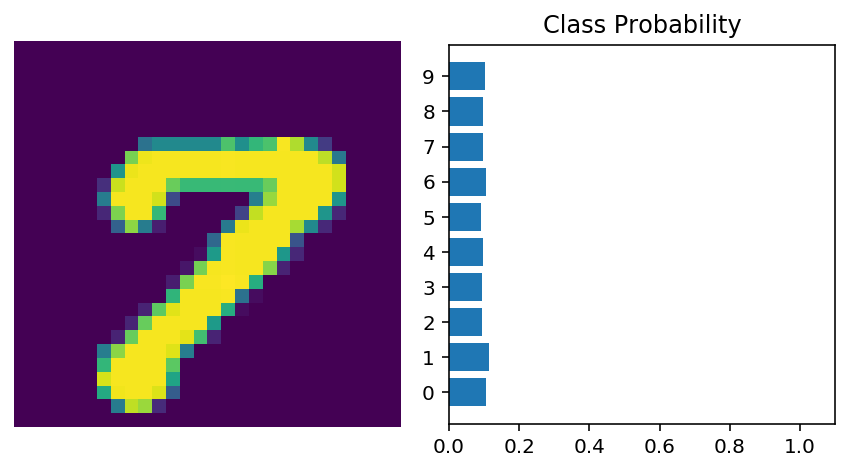

In [16]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

###### Using nn.Sequential
We can use  `nn.Sequential` that PyTorch provides to create a networks where a tensor is passed sequentially through operations.

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


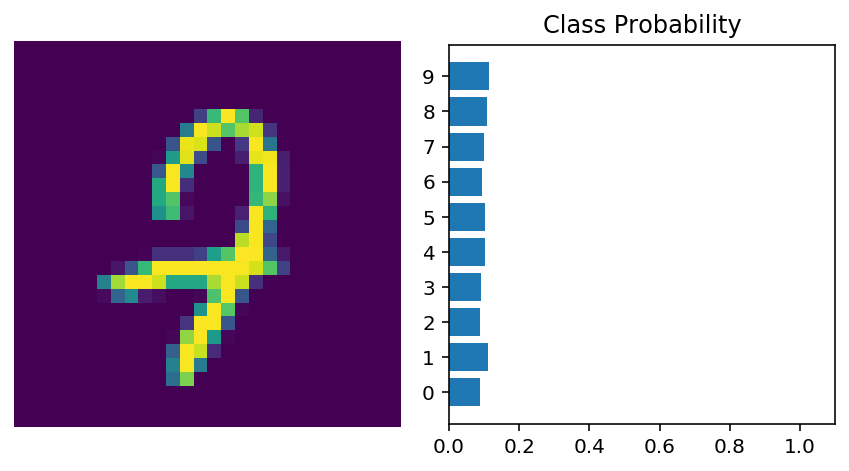

In [17]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [18]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0335, -0.0293,  0.0321,  ..., -0.0254,  0.0273, -0.0321],
        [ 0.0068,  0.0115, -0.0107,  ..., -0.0163,  0.0190, -0.0172],
        [-0.0266, -0.0006, -0.0132,  ...,  0.0154,  0.0333, -0.0282],
        ...,
        [ 0.0266, -0.0112, -0.0088,  ..., -0.0170,  0.0055,  0.0187],
        [-0.0353, -0.0170,  0.0035,  ..., -0.0338, -0.0246, -0.0251],
        [ 0.0195, -0.0091, -0.0327,  ...,  0.0280, -0.0204,  0.0282]],
       requires_grad=True)

We can also pass in an `OrderedDict` to name the individual layers and operations, instead of using incremental integers. Dictionary keys must be unique, so each operation must have a different name.

In [19]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [20]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
